In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
import theano
import theano.tensor as tt
import itertools
from IPython.core.pylabtools import figsize
pd.set_option('display.max_columns', 30)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# import data
from google.colab import files
files.upload()
df=pd.read_csv("modified data lily.csv", sep=";")

Saving modified data lily.csv to modified data lily.csv


In [ ]:
# convert entries to float
df = df.replace(",", ".", regex=True)
df["TSH"] = df["TSH"].astype("float")
df["TSH"]=df["TSH"].dropna()

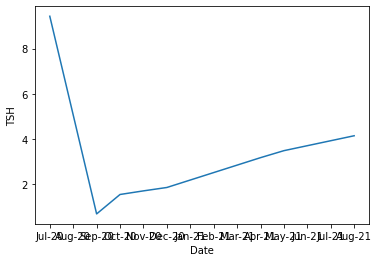

In [ ]:
sns.lineplot(x="Date", y="TSH", data=df)
plt.show()

In [ ]:
y_simple = df['TSH']
x_n = "Date"
x_0 = df[x_n].values
print(x_0)

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)

    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)

    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)